# Predictive & Prescriptive Analytics


Normally, the operation of a certain machine is guided by a set of process parameters that influence process quality that dictate the final result of a certain product. In order to achieve that, the correct process parameters need to be chosen that would yield the correct process quality subject to a set of process conditions. Hence, there is an implicit relation between the influence of machine parameters in the final quality of the product. This way, a good understanding of how process parameters influence the process quality is peremptory for process automation. Normally, the exploration of these relations is made by a set of experiments by performing a Design of Experiment (DoE) - Full Factorial Design or Fractional Factorial Design - to know how of the process parameters map into the process quality. From these experimental findings, normally a dataset is built and machine learning techniques can be used to build process models, which is a simplified version of the real world dynamics - also known as surrogate model. However, as referred before, for the selection of the most suitable process parameters according to certain process quality, this model is necessary but not sufficient. Additionally, an optimization problem is normally formulated to explore the machine parameter feature space that minimizes the distance between the desired process quality and the ones yielded by the process model.

To better understand the presented scenario of process parameter optimization, a description of the process will be given. The laser seam welding process is composed of laser head mounted in a robotic arm with the goal of welding two metal sheets by issuing radiation from the laser head to a local area where the materials need to be joined. Thus, it creates a melting zone around the laser focus in both sheets, which solidifies once the the laser beam is moved through the desired welding area. This produces a continuous welding seam while the beam is moved along the overlapping sheets at a controlled speed. In this particular scenario, the process parameters that can be changed are described by 3 independent variables:
- Laser Head Power (P);
- Focal Distance (F) from the surface;
- Robotic Arm Velocity (V). 

The observed process quality is described by: 
- Weld Width (W);
- Penetration Depth (D) of the welded area.

For this work, 3 different datasets are available representing 3 different welding processes in the same machine, where different pairs of materials with different properties and thicknesses were used. These pairs are namely DC04-HC380LA (Process 1), HC260LA-HC420LA (Process 2) and HC420LA-HC380LA (Process 3). Although having 3 different datasets, for simplicity educational purposes only the first process is being used. The following image is a summary of the all processes and datasets.


<div>
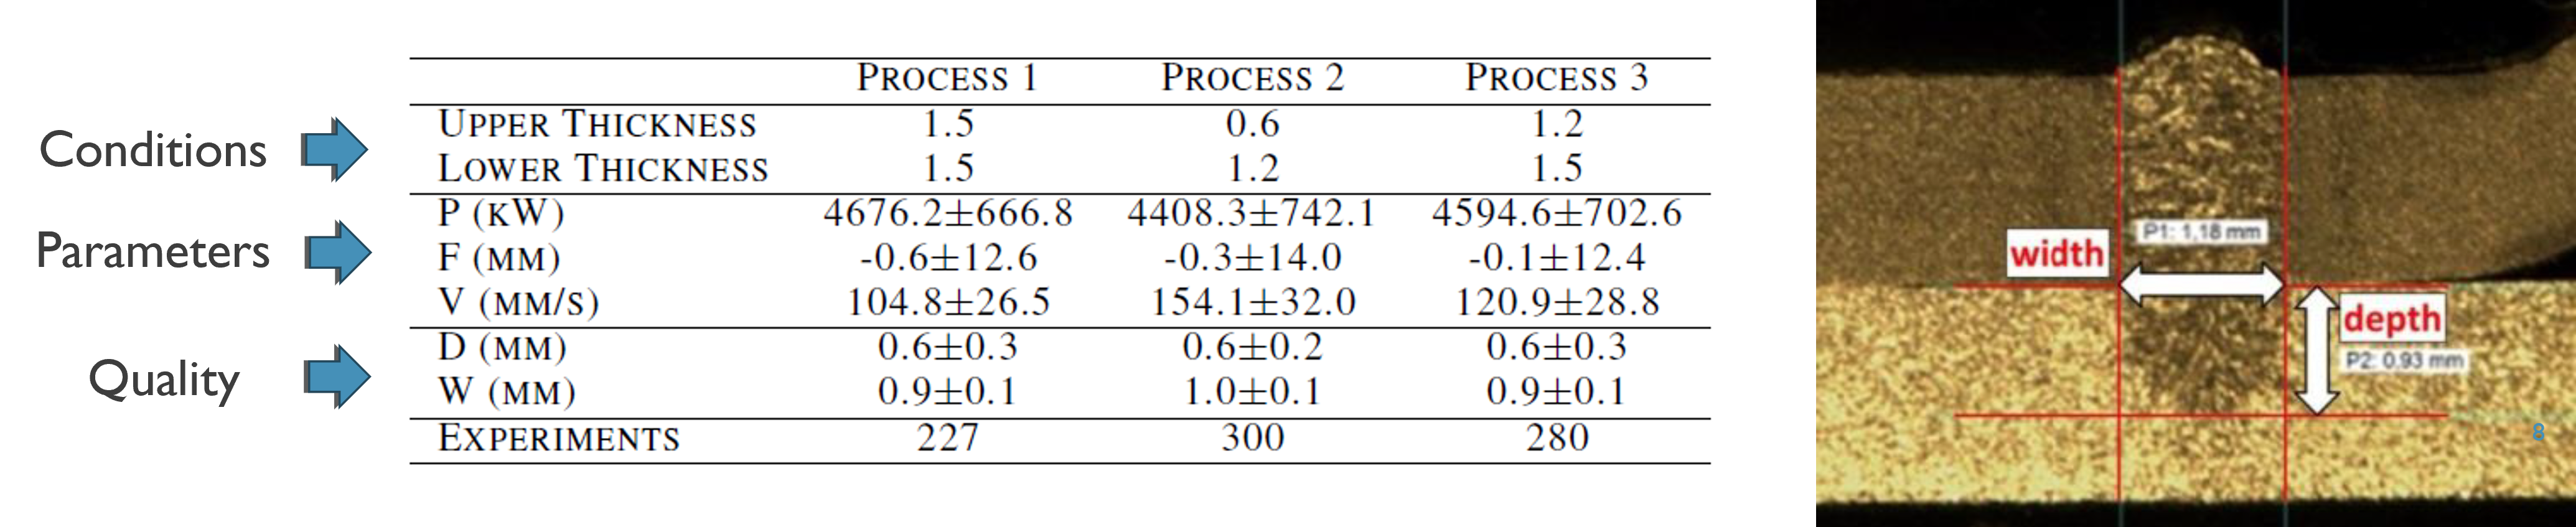
</div>

If some of these results or dataset is used, please consider citing the following publication:

    Reis, J., & Gonçalves, G. (2018, September). Laser Seam Welding optimization using Inductive Transfer Learning with Artificial Neural Networks. In 2018 IEEE 23rd International Conference on Emerging Technologies and Factory Automation (ETFA) (Vol. 1, pp. 646-653). IEEE.
    
    Reis, J., & Gonçalves, G. (2018). Process Modeling and Parameter Optimization for Machine Calibration in Smart Manufacturing for Laser Seam Welding. In The Seventh International Conference on Intelligent Systems and Applications (INTELLI). IARIA.

## Data import

Importing data from CSV files collected at the shop-floor. 

In [15]:
import numpy as np
from sklearn.externals import joblib
import pandas as pd

# Laser welding processes with different materials
dataset1 = 'DC04_HC380LA'
dataset2 = 'HC260LA_HC420LA'
dataset3 = 'HC420LA_HC380LA'
dataset_name = [dataset1,dataset2,dataset3]
dataset_path = "dataset/"
dataset_meta = ['power','focus','weld_velocity','penetration','weld_width']

np.set_printoptions(suppress=True)

#Load datasets
df_dc04 = pd.read_csv(dataset_path + dataset1 + "_no_keyhole.csv",delimiter=";")
df_hc260 = pd.read_csv(dataset_path + dataset2 + "_no_keyhole.csv",delimiter=";")
df_hc420 = pd.read_csv(dataset_path + dataset3 + "_no_keyhole.csv",delimiter=";")


#print('df_dc04 head: ' , df_dc04.head(10))
#print('df_hc260 head: ' , df_hc260.head(10))
#print('df_hc420 head: ' , df_hc420.head(10))

print('df_dc04 shape: ' , df_dc04.shape)
print('df_hc260 shape: ' , df_hc260.shape)
print('df_hc420 shape: ' , df_hc420.shape)

target_dataset = df_hc260

df_dc04 shape:  (188, 5)
df_hc260 shape:  (260, 5)
df_hc420 shape:  (220, 5)


## Data Visualization - Scatter Matrix Plot

DC04_HC380LA


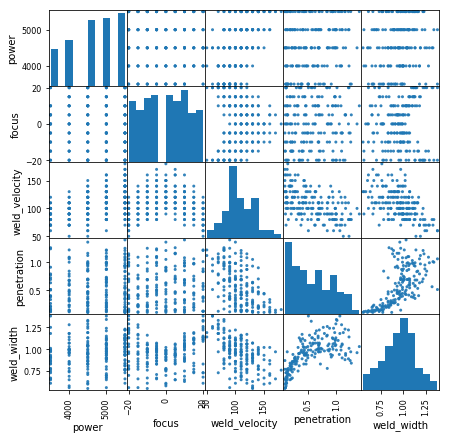

HC260LA_HC420LA


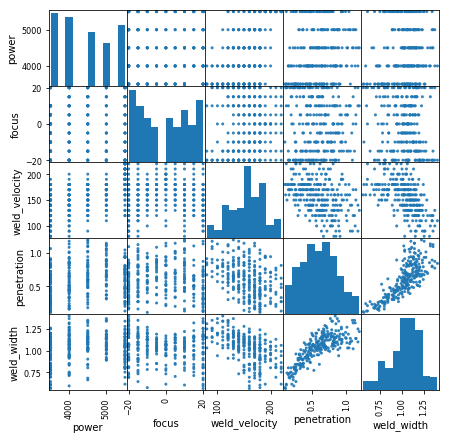

HC420LA_HC380LA


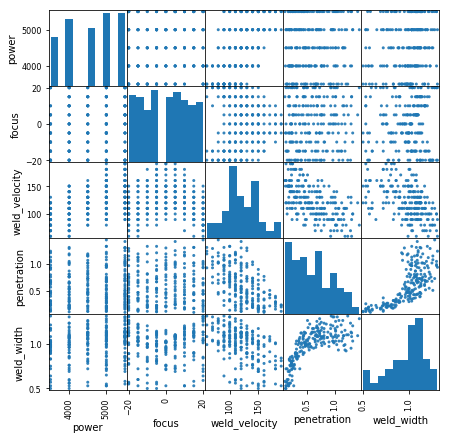

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# resize scatter matrix plot
plt.rcParams["figure.figsize"] = (7,7)

print(dataset1)
pd.plotting.scatter_matrix(df_dc04, alpha=0.9)
plt.show()

print(dataset2)
pd.plotting.scatter_matrix(df_hc260, alpha=0.9)
plt.show()

print(dataset3)
pd.plotting.scatter_matrix(df_hc420, alpha=0.9)
plt.show()


## Data Visualization - 3D Scatter plot

<IPython.core.display.Javascript object>


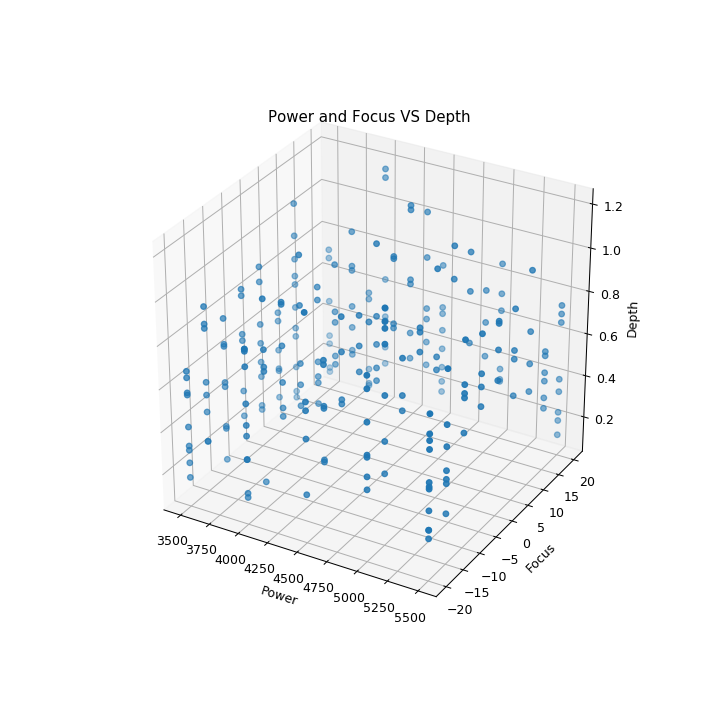

<IPython.core.display.Javascript object>


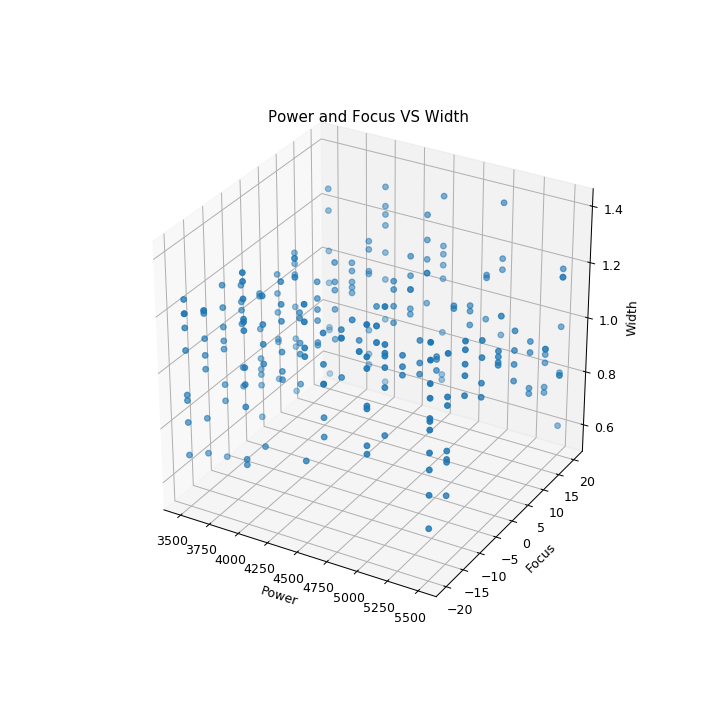

<IPython.core.display.Javascript object>


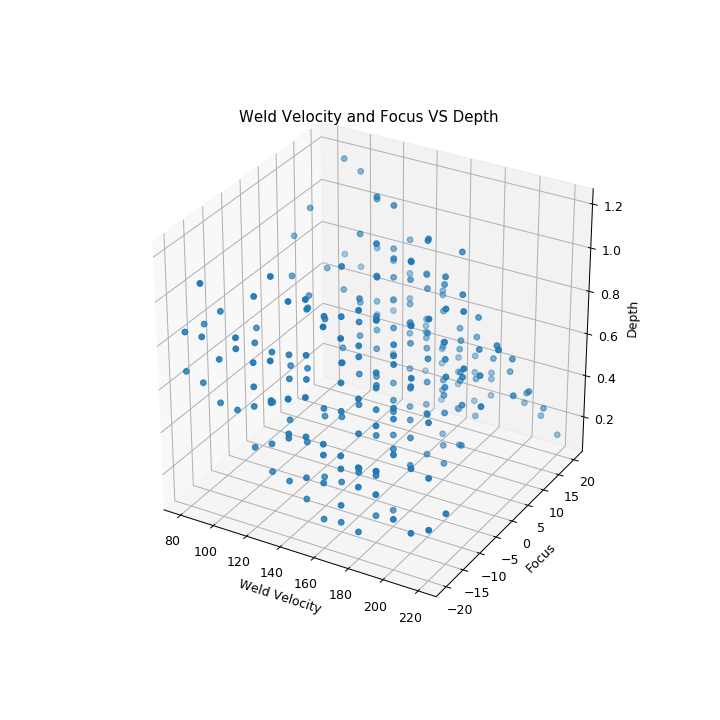

<IPython.core.display.Javascript object>


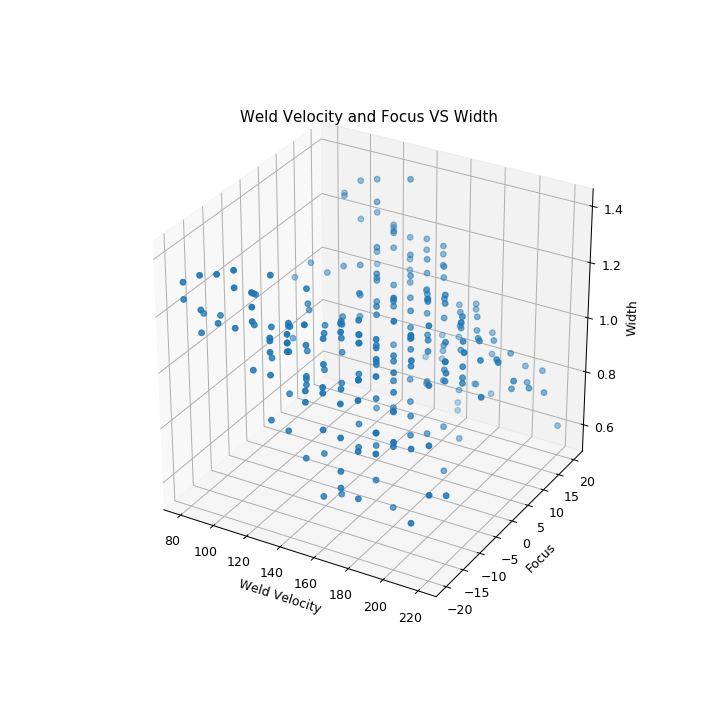

<IPython.core.display.Javascript object>


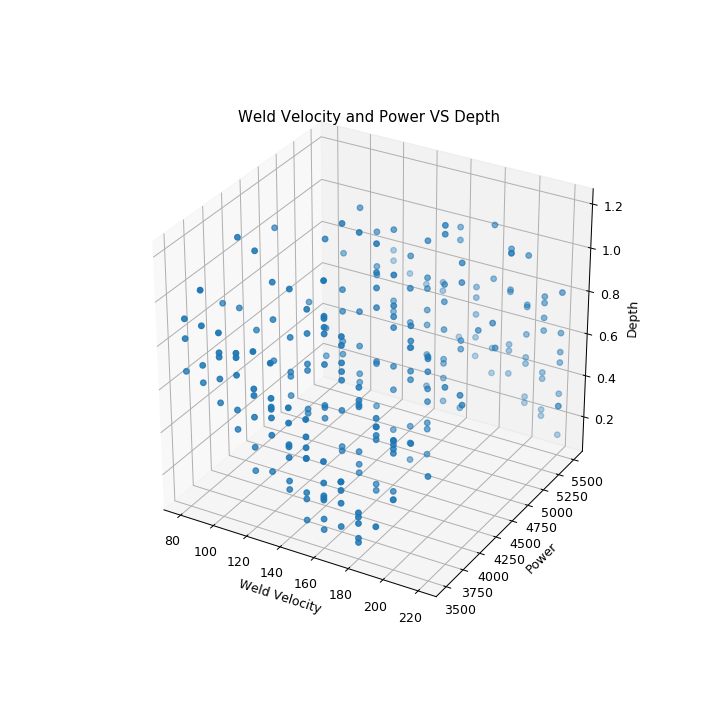

<IPython.core.display.Javascript object>


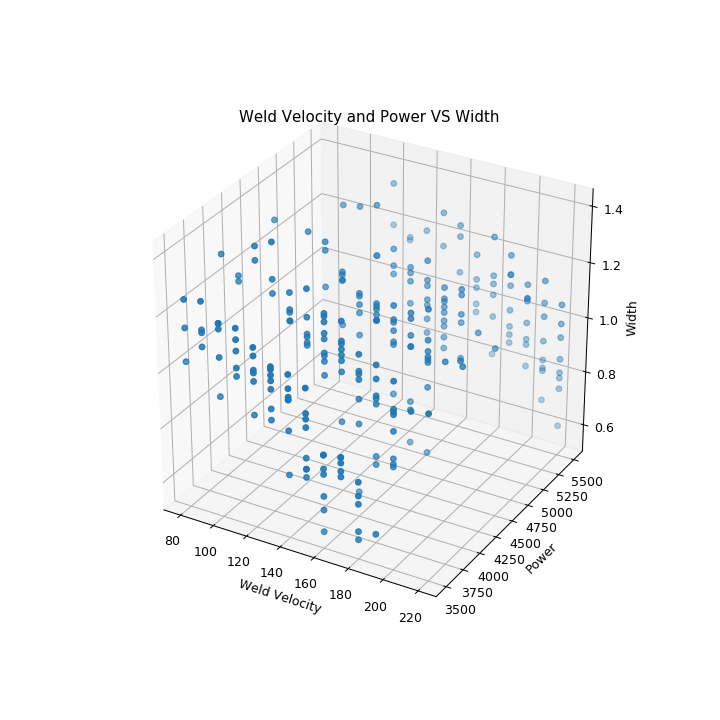

In [23]:

################################################################
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (8,8)

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, target_dataset[["penetration"]].values)
ax.set_title("Power and Focus VS Depth")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, target_dataset[["weld_width"]].values)
ax.set_title("Power and Focus VS Width")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")








##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, target_dataset[["penetration"]].values)
ax.set_title("Weld Velocity and Focus VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, target_dataset[["weld_width"]].values)
ax.set_title("Weld Velocity and Focus VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")






##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, target_dataset[["penetration"]].values)
ax.set_title("Weld Velocity and Power VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Depth")

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, target_dataset[["weld_width"]].values)
ax.set_title("Weld Velocity and Power VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Width")


plt.show()

## Data Visualization - Heatmap

From the provided heatmap, we could extrapolate a couple things:

- Correlation between weld velocity and both penetration depth and weld width is high, which is a good indication for modeling purposes
- Correlation among both outputs is also high, which might indicate that one can be removed to simplify the problem. However, since these two outputs are related to quality and we will be needing these for afterwards estimation, none will be removed
- No high correlation were observed among input features, which indicate that all of them should be contributing for the output.

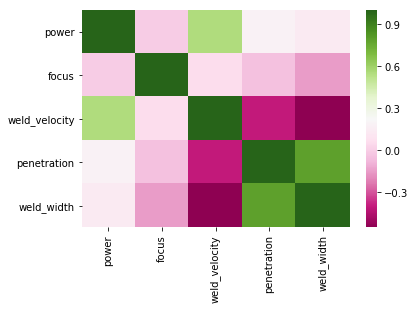

In [24]:
%matplotlib inline
import seaborn as sns

corr = target_dataset.corr()

sns.heatmap(corr, cmap="PiYG")

plt.show()

# Outlier detection

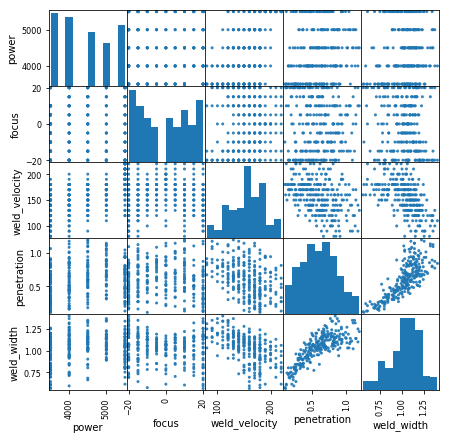

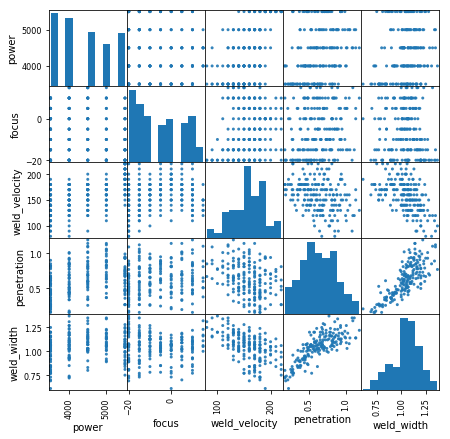

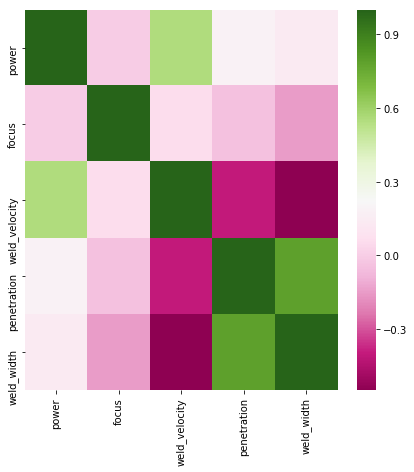

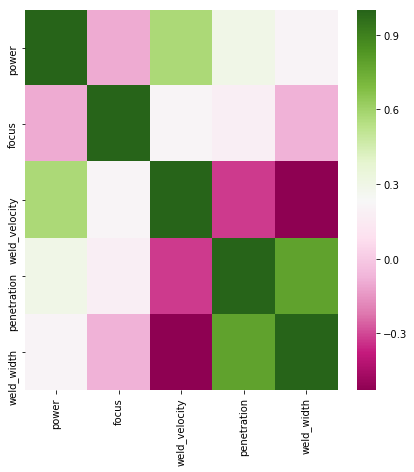

Original shape:  (260, 5)
Resulting shape:  (192, 5)


In [26]:
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#############################################
clf = EllipticEnvelope(contamination=0.261)
#clf = OneClassSVM(nu=0.261, gamma=0.05)
#clf = EllipticEnvelope(support_fraction=1., contamination=0.4)

clf.fit(target_dataset)
out = clf.predict(target_dataset)
labels = np.where(out == -1)

# create a new version of the dataset with filtered data
target_dataset_filt = target_dataset.drop(target_dataset.index[labels[0]])


#############################################
# Scatter matrix plot for unfiltered data
plt.rcParams["figure.figsize"] = (7,7)
pd.plotting.scatter_matrix(target_dataset, alpha=0.9)
plt.show()

#############################################
# Scatter matrix plot for filtered data
plt.rcParams["figure.figsize"] = (7,7)
pd.plotting.scatter_matrix(target_dataset_filt, alpha=0.9)
plt.show()


#############################################
# Correlation matrix for unfiltered data
corr = target_dataset.corr()
sns.heatmap(corr, cmap="PiYG")
plt.show()

#############################################
# Correlation matrix for filtered data
corr = target_dataset_filt.corr()
sns.heatmap(corr, cmap="PiYG")
plt.show()



#############################################
# Assuming outlier removal
print("Original shape: " , target_dataset.shape)
#target_dataset = target_dataset_filt
print("Resulting shape: " , target_dataset_filt.shape)

# Data Normalization

In [27]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


min_max_scaler_x = preprocessing.MinMaxScaler()
X = target_dataset[["power", "focus", "weld_velocity"]].values
X_norm = min_max_scaler_x.fit_transform(X)

min_max_scaler_y = preprocessing.MinMaxScaler()
Y = target_dataset[["penetration", "weld_width"]].values
Y_norm = min_max_scaler_y.fit_transform(Y)

# Train & Testing

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_norm, test_size=0.3, random_state=0)
print("X_train:" , X_train.shape)
print("X_test:" , X_test.shape)
print("y_train:" , Y_train.shape)
print("y_test:" , Y_test.shape)



# define base model
def baseline_model():
    # create model
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer="uniform", activation="sigmoid", input_dim = 3))
    classifier.add(Dense(units = 10, kernel_initializer="uniform", activation="sigmoid"))
    classifier.add(Dense(units = 2, kernel_initializer="uniform", activation="linear"))
    
    classifier.compile(loss='mean_squared_error', optimizer='adam')
    
    return classifier


##############################
# One
'''
estimator = KerasRegressor(build_fn=baseline_model, epochs=200, batch_size=100, verbose=0)
estimator.fit(X_norm, Y_norm)
'''


'''
##############################
# Pipeline
estimators = []
estimators.append(('standardize', preprocessing.MinMaxScaler()))
estimators.append(("mlp4",KerasRegressor(build_fn=baseline_model, epochs=200, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)

kfold = KFold(n_splits=5)
results = cross_val_score(pipeline, X_norm, Y_norm, cv=kfold)
print("Standardize: %.2f (%.2f) MSE" % (results.mean(), results.std()))
'''


##############################
# GridSearch
import multiprocessing
n_cpus = multiprocessing.cpu_count()

param_grid = {
    'epochs': [100, 200, 500, 1000],
    'batch_size': [50, 100, 200, 500]
}

model = KerasRegressor(build_fn=baseline_model, verbose=0)
grid_search = GridSearchCV(estimator = model,
                    param_grid = param_grid,
                    n_jobs=1, 
                    cv=5,
                    verbose=3,
                    scoring='neg_mean_squared_error',
                    refit=True)

grid_search.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

estimator = grid_search

print("MSE for test set: " , mean_squared_error(Y_test, grid_search.predict(X_test)))


X_train: (182, 3)
X_test: (78, 3)
y_train: (182, 2)
y_test: (78, 2)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] batch_size=50, epochs=100 .......................................
[CV]  batch_size=50, epochs=100, score=-0.05466864604721111, total=   2.2s
[CV] batch_size=50, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  batch_size=50, epochs=100, score=-0.041566924942901644, total=   2.1s
[CV] batch_size=50, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  batch_size=50, epochs=100, score=-0.047522137045102504, total=   2.7s
[CV] batch_size=50, epochs=100 .......................................
[CV]  batch_size=50, epochs=100, score=-0.06264884315337764, total=   2.3s
[CV] batch_size=50, epochs=100 .......................................
[CV]  batch_size=50, epochs=100, score=-0.04442206520956353, total=   2.4s
[CV] batch_size=50, epochs=200 .......................................
[CV]  batch_size=50, epochs=200, score=-0.05394535283829765, total=   3.0s
[CV] batch_size=50, epochs=200 .......................................
[CV]  batch_size=50, epochs=200, score=-0.04096018537769014, total=   2.9s
[CV] batch_size=50, epochs=200 .......................................
[CV]  batch_size=50, epochs=200, score=-0.04656546483342523, total=   2.7s
[CV] batch_size=50, epochs=200 .......................................
[CV]  batch_size=50, epochs=200, score=-0.061614202764560005, total=   2.6s
[CV] batch_size=50, epochs=200 ................

[CV]  batch_size=200, epochs=1000, score=-0.05767319143396262, total=   4.7s
[CV] batch_size=200, epochs=1000 .....................................
[CV]  batch_size=200, epochs=1000, score=-0.04026703738933718, total=   4.7s
[CV] batch_size=500, epochs=100 ......................................
[CV]  batch_size=500, epochs=100, score=-0.05473529437406635, total=   3.0s
[CV] batch_size=500, epochs=100 ......................................
[CV]  batch_size=500, epochs=100, score=-0.04195161912438943, total=   3.0s
[CV] batch_size=500, epochs=100 ......................................
[CV]  batch_size=500, epochs=100, score=-0.04852753628851917, total=   3.2s
[CV] batch_size=500, epochs=100 ......................................
[CV]  batch_size=500, epochs=100, score=-0.06255550490731453, total=   3.0s
[CV] batch_size=500, epochs=100 ......................................
[CV]  batch_size=500, epochs=100, score=-0.04573176185216133, total=   3.1s
[CV] batch_size=500, epochs=200 ........

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  5.2min finished


Best: -0.025617 using {'batch_size': 50, 'epochs': 1000}
-0.050143 (0.007608) with: {'batch_size': 50, 'epochs': 100}
-0.049306 (0.007520) with: {'batch_size': 50, 'epochs': 200}
-0.042152 (0.006301) with: {'batch_size': 50, 'epochs': 500}
-0.025617 (0.004781) with: {'batch_size': 50, 'epochs': 1000}
-0.050350 (0.007701) with: {'batch_size': 100, 'epochs': 100}
-0.049855 (0.007491) with: {'batch_size': 100, 'epochs': 200}
-0.046743 (0.007239) with: {'batch_size': 100, 'epochs': 500}
-0.033204 (0.005868) with: {'batch_size': 100, 'epochs': 1000}
-0.050369 (0.007456) with: {'batch_size': 200, 'epochs': 100}
-0.050319 (0.007649) with: {'batch_size': 200, 'epochs': 200}
-0.049376 (0.007549) with: {'batch_size': 200, 'epochs': 500}
-0.045774 (0.007087) with: {'batch_size': 200, 'epochs': 1000}
-0.050674 (0.007245) with: {'batch_size': 500, 'epochs': 100}
-0.050337 (0.007685) with: {'batch_size': 500, 'epochs': 200}
-0.049353 (0.007537) with: {'batch_size': 500, 'epochs': 500}
-0.045740 (0.0

# Model Prediction - MSE Histogram

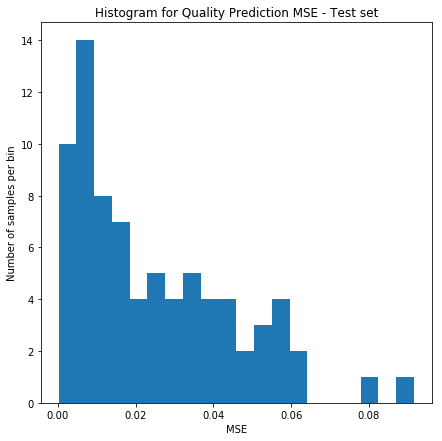

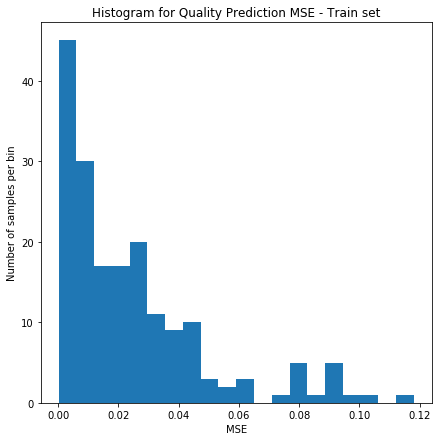

In [29]:
##########################################################
# Test set
all_res_predict = []

for i in range(Y_test.shape[0]):
    all_res_predict.append(mean_squared_error(Y_test[i], grid_search.predict(np.matrix(X_test[i]))))

plt.hist(all_res_predict, bins = 20)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE - Test set")
plt.show()

###########################################################
# Train set
all_res_predict = []

for i in range(Y_train.shape[0]):
    all_res_predict.append(mean_squared_error(Y_train[i], grid_search.predict(np.matrix(X_train[i]))))

plt.hist(all_res_predict, bins = 20)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE - Train set")
plt.show()

# Model Prediction - Visualization 2D

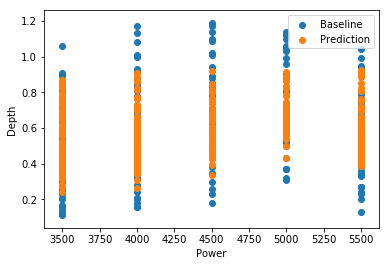

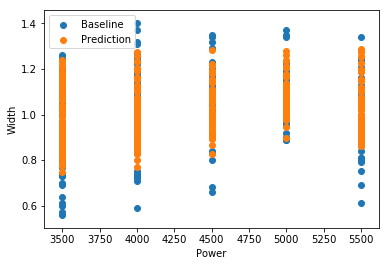

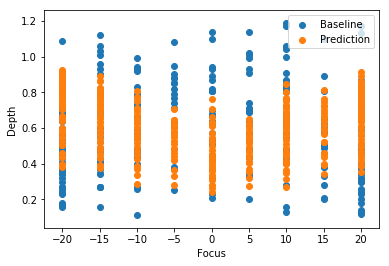

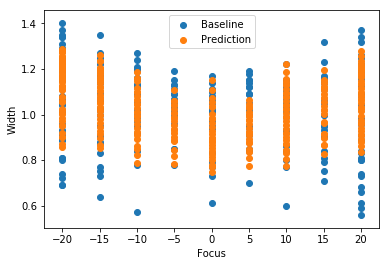

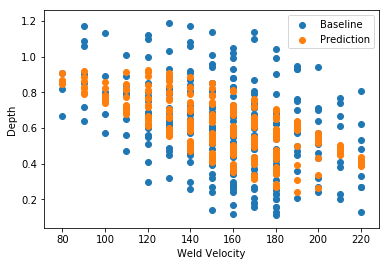

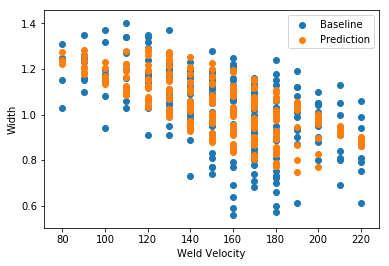

In [30]:
%matplotlib inline

pred_norm = estimator.predict(X_norm)
pred_denorm = min_max_scaler_y.inverse_transform(pred_norm)
pred_pd = pd.DataFrame(pred_denorm, columns=[dataset_meta[3:]])

plt.scatter(target_dataset[["power"]].values, target_dataset[["penetration"]].values, label="Baseline")
plt.scatter(target_dataset[["power"]].values, pred_pd[["penetration"]].values, label="Prediction")
plt.xlabel("Power")
plt.ylabel("Depth")
plt.legend()
plt.show()

plt.scatter(target_dataset[["power"]].values, target_dataset[["weld_width"]].values, label="Baseline")
plt.scatter(target_dataset[["power"]].values, pred_pd[["weld_width"]].values, label="Prediction")
plt.xlabel("Power")
plt.ylabel("Width")
plt.legend()
plt.show()


plt.scatter(target_dataset[["focus"]].values, target_dataset[["penetration"]].values, label="Baseline")
plt.scatter(target_dataset[["focus"]].values, pred_pd[["penetration"]].values, label="Prediction")
plt.xlabel("Focus")
plt.ylabel("Depth")
plt.legend()
plt.show()

plt.scatter(target_dataset[["focus"]].values, target_dataset[["weld_width"]].values, label="Baseline")
plt.scatter(target_dataset[["focus"]].values, pred_pd[["weld_width"]].values, label="Prediction")
plt.xlabel("Focus")
plt.ylabel("Width")
plt.legend()
plt.show()

plt.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["penetration"]].values, label="Baseline")
plt.scatter(target_dataset[["weld_velocity"]].values, pred_pd[["penetration"]].values, label="Prediction")
plt.xlabel("Weld Velocity")
plt.ylabel("Depth")
plt.legend()
plt.show()

plt.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["weld_width"]].values, label="Baseline")
plt.scatter(target_dataset[["weld_velocity"]].values, pred_pd[["weld_width"]].values, label="Prediction")
plt.xlabel("Weld Velocity")
plt.ylabel("Width")
plt.legend()
plt.show()

# Model Prediction - Visualization 3D

<IPython.core.display.Javascript object>


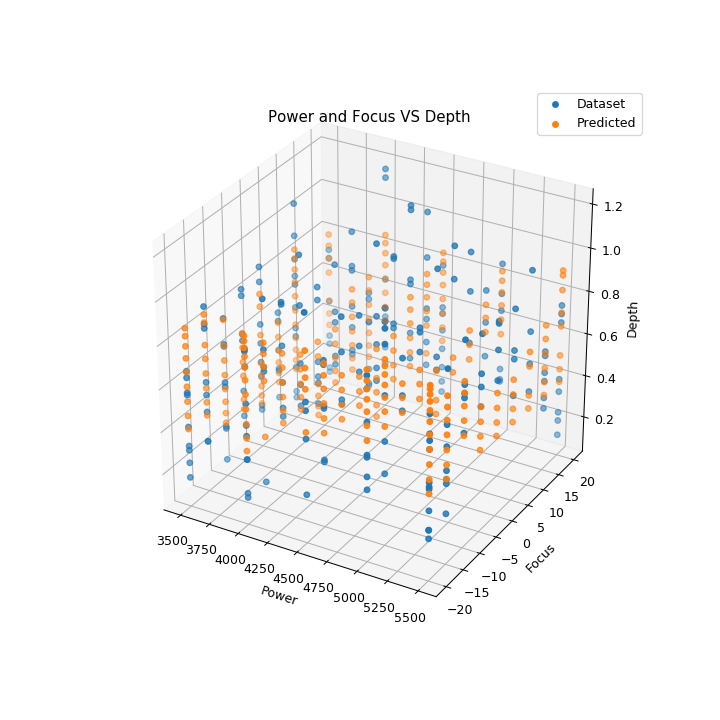

<IPython.core.display.Javascript object>


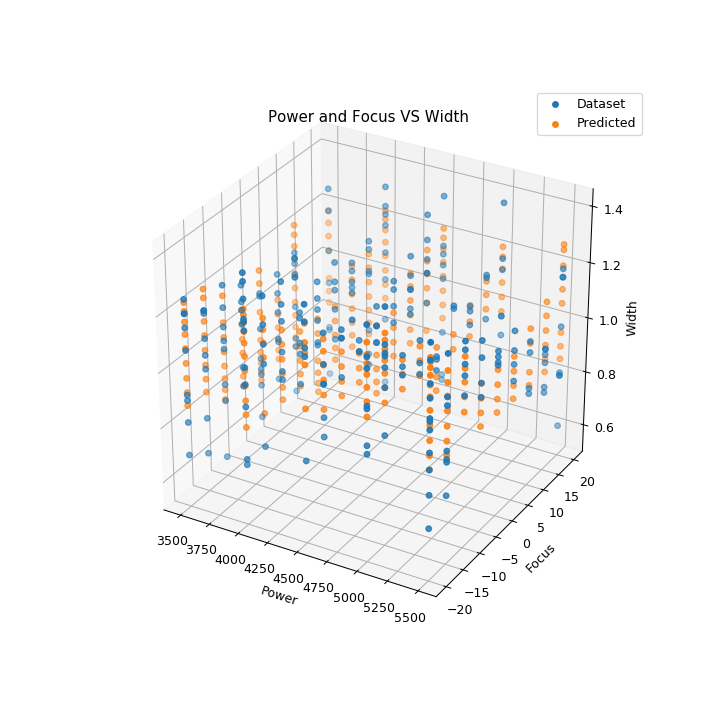

<IPython.core.display.Javascript object>


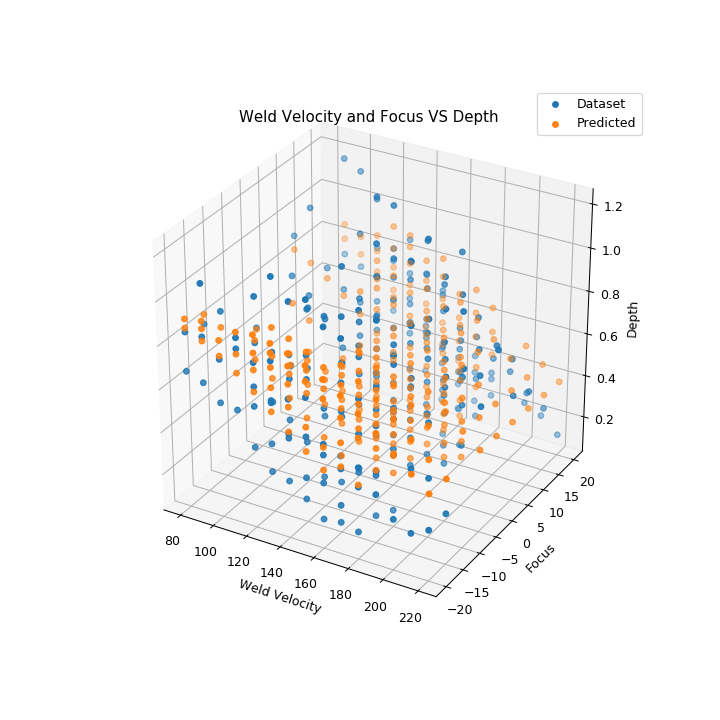

<IPython.core.display.Javascript object>


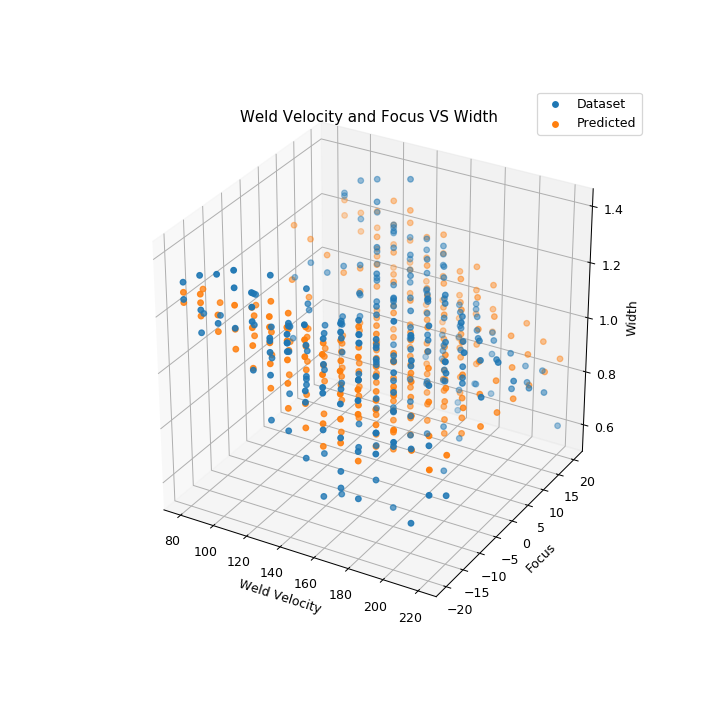

<IPython.core.display.Javascript object>


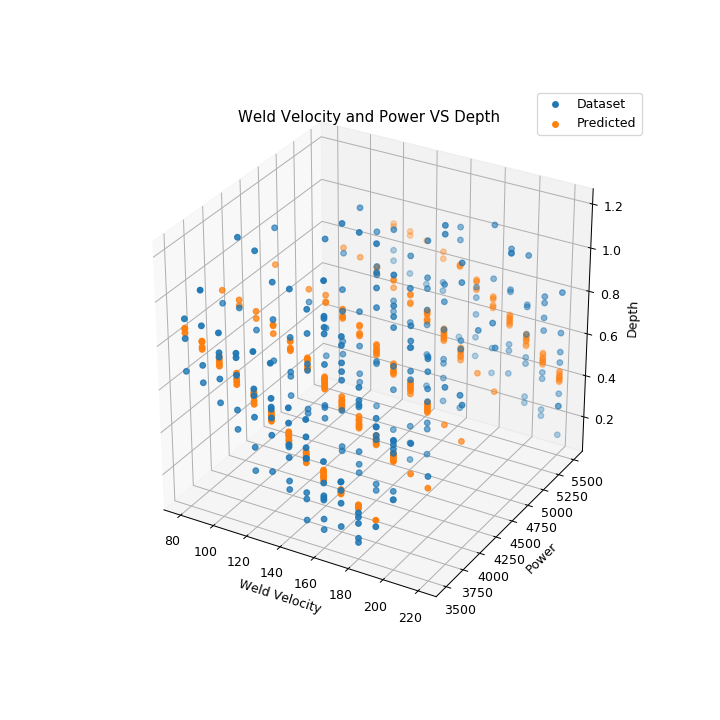

<IPython.core.display.Javascript object>


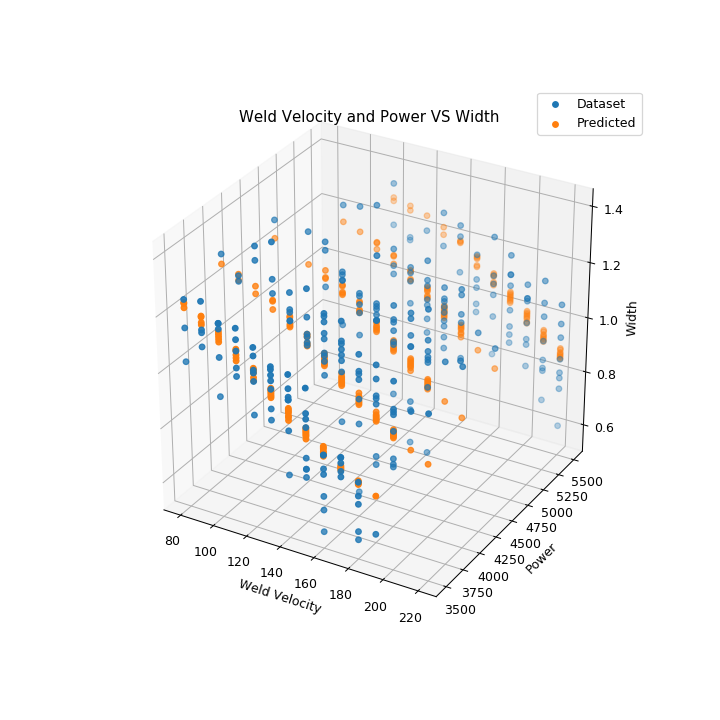

In [35]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (8,8)

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, target_dataset[["penetration"]].values, label="Dataset")
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, pred_pd[["penetration"]].values, label="Predicted")
ax.set_title("Power and Focus VS Depth")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")
ax.legend()

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, target_dataset[["weld_width"]].values, label="Dataset")
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, pred_pd[["weld_width"]].values, label="Predicted")
ax.set_title("Power and Focus VS Width")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")
ax.legend()







##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, target_dataset[["penetration"]].values, label="Dataset")
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, pred_pd[["penetration"]].values, label="Predicted")
ax.set_title("Weld Velocity and Focus VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")
ax.legend()

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, target_dataset[["weld_width"]].values, label="Dataset")
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, pred_pd[["weld_width"]].values, label="Predicted")
ax.set_title("Weld Velocity and Focus VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")
ax.legend()









##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, target_dataset[["penetration"]].values, label="Dataset")
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, pred_pd[["penetration"]].values, label="Predicted")
ax.set_title("Weld Velocity and Power VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Depth")
ax.legend()

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, target_dataset[["weld_width"]].values, label="Dataset")
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, pred_pd[["weld_width"]].values, label="Predicted")
ax.set_title("Weld Velocity and Power VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Width")
ax.legend()


plt.show()

# Meta-heuristics Parameter Estimation

As the main purpose of training such models is to perform process parameter optimization, we will now assess the performance of the model by providing a set of process quality values from the dataset, and by using optimization algorithms, the best process parameters should be found. This optimization process simulates what could happen in a real scenario when a shop-floor operator needs to know the most suitable machine parameterization in order to meet the customer specifications. In this context, the process quality parameters defined by the customer are the weld width and depth yielding more robust or fragile welds in the final product. Different customers might have different requirements depending on the product application. One might only want to join metal sheets for aesthetics, where not a strong joining is required when compared with a car chassis that should be as strong and robust as possible in the automotive industry. Therefore, based on these quality values, the process parameter optimization should return the parameters to be used in the machine.

Regarding the problem formulation, we aim to minimize the difference between the real process quality (here called target) and the solution generated by the algorithm. For that purpose, the loss function used was simply the MSE to assess these differences.

In [43]:
%matplotlib inline

from scipy.optimize import minimize, basinhopping
from random import randint
from scipy.optimize import dual_annealing
import math
import matplotlib.pyplot as plt
all_results = []
all_estimations = []

def mse_calc(x_values):
    return math.sqrt(mean_squared_error(estimator.predict(np.matrix(x_values)), target))

def callbackF(x_values, f, context):
    global iteration
    print("Iteration: {0}, Estimation: {1}, MSE: {2}".format(iteration, x_values, mse_calc(x_values)))
    iteration += 1
    
for sample_i in range(X_test.shape[0]):
    
    iteration = 1

    print("X norm: " , X_test[sample_i])
    print("Y norm: " , Y_test[sample_i])

    # define the target for the optimization routine
    target = Y_test[sample_i]

    print("Target: " , target)

    # Initial guess as an array of 0s
    x0 = [0] * X_test.shape[1]
    # boundaries are important to avoid exploring solutions outside the space where the model was trained for.
    # Since data was normalized the boundaries are between 0 and 1.
    bnds = ((0, 1), (0, 1), (0, 1))
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bnds}


    ###########################################################
    # Optimization
    #res = basinhopping(mse_calc, x0, minimizer_kwargs=minimizer_kwargs, niter=20000, niter_success=1000, T=10)
    #res = minimize(mse_calc, x0, method='nelder-mead',options={'xatol': 1e-15, 'disp': True, 'fatol': 1e-15})
    
    res = dual_annealing(mse_calc,
                         bounds=bnds,
                         #callback=callbackF,
                         restart_temp_ratio = 0.01,
                         initial_temp = 10000)
    

    estimation = res.x
    prediction = estimator.predict(np.matrix(estimation))

    mse_estimation = mean_squared_error(estimation, X_test[sample_i])
    mse_prediction = mean_squared_error(prediction, target)
    
    print("Estimated parameters (X norm): " , estimation , X_test[sample_i], " MSE: " , mse_estimation)
    print("Closest quality prediction (Y norm): " , prediction , target, " MSE: " , mse_prediction)

    print("Estimated parameters (X): " , min_max_scaler_x.inverse_transform(np.matrix(estimation)) , min_max_scaler_x.inverse_transform(np.matrix(X_test[sample_i])))
    print("Closest quality prediction (Y): " , min_max_scaler_y.inverse_transform(np.matrix(prediction)), min_max_scaler_y.inverse_transform(np.matrix(target)))
    
    print("Iteration " , sample_i , " out of " , X_test.shape[0])
    
    all_results.append(mse_prediction)
    all_estimations.append(mse_estimation)


X norm:  [0.25       1.         0.28571429]
Y norm:  [0.37037037 0.73809524]
Target:  [0.37037037 0.73809524]
Estimated parameters (X norm):  [0.00954667 0.08276084 0.29747148] [0.25       1.         0.28571429]  MSE:  0.2997612384203016
Closest quality prediction (Y norm):  [0.5046902 0.604671 ] [0.37037037 0.73809524]  MSE:  0.017921917789241074
Estimated parameters (X):  [[3519.09333467  -16.68956644  121.646007  ]] [[4000.   20.  120.]]
Closest quality prediction (Y):  [[0.6550654 1.0679237]] [[0.51 1.18]]
Iteration  0  out of  78
X norm:  [0. 0. 0.]
Y norm:  [0.51851852 0.82142857]
Target:  [0.51851852 0.82142857]
Estimated parameters (X norm):  [0.02728249 0.11031587 0.1555054 ] [0. 0. 0.]  MSE:  0.01236528569079772
Closest quality prediction (Y norm):  [0.6206846 0.7230817] [0.51851852 0.82142857]  MSE:  0.010055009303445491
Estimated parameters (X):  [[3554.56498265  -15.58736503  101.77075654]] [[3500.  -20.   80.]]
Closest quality prediction (Y):  [[0.7803394 1.1673886]] [[0.

Estimated parameters (X norm):  [0.16006738 0.0241372  0.53824399] [0.25       1.         0.42857143]  MSE:  0.3241413851125305
Closest quality prediction (Y norm):  [0.35699615 0.4576052 ] [0.31481481 0.5       ]  MSE:  0.0017882914549146463
Estimated parameters (X):  [[3820.13475895  -19.03451208  155.35415862]] [[4000.   20.  140.]]
Closest quality prediction (Y):  [[0.49555585 0.9443884 ]] [[0.45 0.98]]
Iteration  16  out of  78
X norm:  [1.         0.75       0.71428571]
Y norm:  [0.86111111 0.55952381]
Target:  [0.86111111 0.55952381]
Estimated parameters (X norm):  [0.96544928 0.4766245  0.52447942] [1.         0.75       0.71428571]  MSE:  0.03731811598238446
Closest quality prediction (Y norm):  [0.6535573 0.7574222] [0.86111111 0.55952381]  MSE:  0.041121180350831066
Estimated parameters (X):  [[5430.89856207   -0.93502015  153.42711866]] [[5500.   10.  180.]]
Closest quality prediction (Y):  [[0.8158419 1.1962346]] [[1.04 1.03]]
Iteration  17  out of  78
X norm:  [0.75      

Estimated parameters (X norm):  [0.07116548 0.46437004 0.50955526] [0.25 0.   0.5 ]  MSE:  0.0825708750699153
Closest quality prediction (Y norm):  [0.32313064 0.42420146] [0.21296296 0.53571429]  MSE:  0.012286013541426725
Estimated parameters (X):  [[3642.33096561   -1.42519824  151.3377361 ]] [[4000.  -20.  150.]]
Closest quality prediction (Y):  [[0.4589811 0.9163292]] [[0.34 1.01]]
Iteration  32  out of  78
X norm:  [0.75       0.125      0.57142857]
Y norm:  [0.57407407 0.78571429]
Target:  [0.57407407 0.78571429]
Estimated parameters (X norm):  [0.04249264 0.67963596 0.11537826] [0.75       0.125      0.57142857]  MSE:  0.33872319805863893
Closest quality prediction (Y norm):  [0.6294526 0.7322   ] [0.57407407 0.78571429]  MSE:  0.002965277770178334
Estimated parameters (X):  [[3584.98528227    7.18543824   96.15295622]] [[5000.  -15.  160.]]
Closest quality prediction (Y):  [[0.7898088 1.175048 ]] [[0.73 1.22]]
Iteration  33  out of  78
X norm:  [0.         0.75       0.2142857

Estimated parameters (X norm):  [0.0012552  0.00898704 0.3276027 ] [0.         0.625      0.42857143]  MSE:  0.12988940728444665
Closest quality prediction (Y norm):  [0.47868714 0.57855546] [0.42592593 0.63095238]  MSE:  0.002764591130321639
Estimated parameters (X):  [[3502.51040821  -19.64051828  125.86437867]] [[3500.    5.  140.]]
Closest quality prediction (Y):  [[0.6269821 1.0459865]] [[0.57 1.09]]
Iteration  48  out of  78
X norm:  [0.5        0.         0.42857143]
Y norm:  [0.37962963 0.72619048]
Target:  [0.37962963 0.72619048]
Estimated parameters (X norm):  [0.06871022 0.22536491 0.31889809] [0.5        0.         0.42857143]  MSE:  0.08294281786851233
Closest quality prediction (Y norm):  [0.502975  0.6029428] [0.37962963 0.72619048]  MSE:  0.015202030436522228
Estimated parameters (X):  [[3637.42044568  -10.98540373  124.64573301]] [[4500.  -20.  140.]]
Closest quality prediction (Y):  [[0.653213  1.0664719]] [[0.52 1.17]]
Iteration  49  out of  78
X norm:  [0.5        0

Estimated parameters (X norm):  [0.99425807 0.09079162 0.5215932 ] [0.5   0.625 0.5  ]  MSE:  0.17671196713123383
Closest quality prediction (Y norm):  [0.6750617  0.78016865] [0.83333333 0.63095238]  MSE:  0.02365770237962468
Estimated parameters (X):  [[5488.516137    -16.36833534  153.02304775]] [[4500.    5.  150.]]
Closest quality prediction (Y):  [[0.8390667 1.2153417]] [[1.01 1.09]]
Iteration  64  out of  78
X norm:  [0.75       0.75       0.57142857]
Y norm:  [0.87037037 0.61904762]
Target:  [0.87037037 0.61904762]
Estimated parameters (X norm):  [0.97854249 0.68652458 0.45653637] [0.75       0.75       0.57142857]  MSE:  0.023153671894021
Closest quality prediction (Y norm):  [0.68586576 0.79169106] [0.87037037 0.61904762]  MSE:  0.03192385533832034
Estimated parameters (X):  [[5457.08498359    7.4609834   143.9150925 ]] [[5000.   10.  160.]]
Closest quality prediction (Y):  [[0.85073507 1.2250204 ]] [[1.05 1.08]]
Iteration  65  out of  78
X norm:  [1.         0.         0.714

# Histogram plot for Quality Prediction and Parameter Estimation

One of the concerns to have once performing machine parameter estimation is to look for the correct information. If you only look for MSE coming from the optimization method, in other words, the difference between the defined target and predicted Y from the meta-heuristic algorithm, you can only conclude that the algorithm used can converge towards a minimum. However, the minimum in terms of different between target and predicted Y might not yield a good machine parameter estimation because different machine parameters X might result in the same, or close, quality prediction Y.

Thus, the correct way to interpret the results and understand if the implemented strategy can be used in production is to assess the MSE of the machine parameter estimation against the ground truth. This way, a histogram should be plotted to understand if the strategy will yield good results in the future.

## Why not using the machine parameters in the loss function?

This should not be the case because in a real situation the customer will provide you with the target quality, and you should only use this information to provide a machine parameter estimation.

Quality Prediction Mean and STD,  0.006284023030725802 0.008607964807985601
Parameter Estimation Mean and STD,  0.15520916972123383 0.13913362934315326


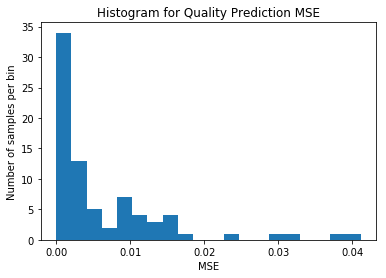

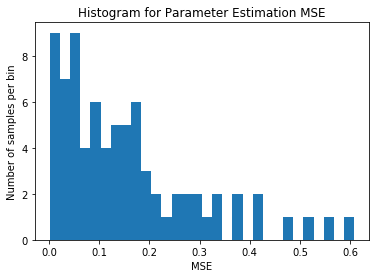

In [44]:
import statistics 

print("Quality Prediction Mean and STD, " , statistics.mean(all_results), statistics.stdev(all_results))
print("Parameter Estimation Mean and STD, " , statistics.mean(all_estimations), statistics.stdev(all_estimations))

plt.hist(all_results, bins = 20)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE")
plt.show()

plt.hist(all_estimations, bins = 30)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Parameter Estimation MSE")
plt.show()

# Better strategy for optimization?

The playbook strategy is based on declaring the initial guess of the optimization method to shorten the search space for optimal or near-optimal solutions. In sum, this strategy finds the machine parameters used in the past the yielded the closest quality prediction. This way, instead of starting with a random or zero array as an initial guess, the algorithm will 'de facto' start with an initial guess. In some cases this might not be true, but the rational for this strategy is that similar product qualities should have similar machine parameters. 

In [41]:
%matplotlib inline

from scipy.optimize import minimize, basinhopping
from random import randint
from scipy.optimize import dual_annealing
import math
import matplotlib.pyplot as plt
all_results_opt = []
all_estimations_opt = []

def mse_calc(x_values):
    return math.sqrt(mean_squared_error(estimator.predict(np.matrix(x_values)), target))

def callbackF(x_values, f, context):
    global iteration
    print("Iteration: {0}, Estimation: {1}, MSE: {2}".format(iteration, x_values, mse_calc(x_values)))
    iteration += 1
    
    
def find_closest_parameter():
    global target
    minimum = 9999
    index = -1
    for i in range(Y_train.shape[0]):
        diff = sum(abs(target-Y_train[i]))
        if diff < minimum:
            minimum = diff
            index = i
    return index
    
for sample_i in range(X_test.shape[0]):
    
    iteration = 1

    print("X norm: " , X_test[sample_i])
    print("Y norm: " , Y_test[sample_i])

    target = Y_test[sample_i]

    print("Target: " , target)

    # Initial guess
    c = find_closest_parameter()
    if c == -1:
        x0 = [0] * X_train.shape[1]
    else:
        x0 = X_train[c]
        
    print("Closest from training set: " , Y_train[c] , target)
    bnds = ((0, 1), (0, 1), (0, 1))
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bnds}


    ###########################################################
    # Optimization
    #res = basinhopping(mse_calc, x0, minimizer_kwargs=minimizer_kwargs, niter=20000, niter_success=1000, T=10)
    #res = minimize(mse_calc, x0, method='nelder-mead',options={'xatol': 1e-15, 'disp': True, 'fatol': 1e-15})
    
    res = dual_annealing(mse_calc,
                         bounds=bnds,
                         #callback=callbackF,
                         restart_temp_ratio = 0.01,
                         initial_temp = 10000)
    
    
    estimation = res.x
    prediction = estimator.predict(np.matrix(estimation))

    mse_estimation = mean_squared_error(estimation, X_test[sample_i])
    mse_prediction = mean_squared_error(prediction, target)
    
    print("Estimated parameters (X norm): " , estimation , X_test[sample_i], " MSE: " , mse_estimation)
    print("Closest quality prediction (Y norm): " , prediction , target, " MSE: " , mse_prediction)

    print("Estimated parameters (X): " , min_max_scaler_x.inverse_transform(np.matrix(estimation)) , min_max_scaler_x.inverse_transform(np.matrix(X_test[sample_i])))
    print("Closest quality prediction (Y): " , min_max_scaler_y.inverse_transform(np.matrix(prediction)), min_max_scaler_y.inverse_transform(np.matrix(target)))
    
    print("Iteration " , sample_i , " out of " , X_test.shape[0])
    
    all_results_opt.append(mse_prediction)
    all_estimations_opt.append(mse_estimation)


X norm:  [0.25       1.         0.28571429]
Y norm:  [0.37037037 0.73809524]
Target:  [0.37037037 0.73809524]
Closest from training set:  [0.36111111 0.76190476] [0.37037037 0.73809524]
Estimated parameters (X norm):  [0.01175258 0.81624004 0.25440254] [0.25       1.         0.28571429]  MSE:  0.030503327817302885
Closest quality prediction (Y norm):  [0.50495744 0.60493803] [0.37037037 0.73809524]  MSE:  0.01792226032284407
Estimated parameters (X):  [[3523.50515127   12.6496016   115.61635569]] [[4000.   20.  120.]]
Closest quality prediction (Y):  [[0.6553541 1.0681479]] [[0.51 1.18]]
Iteration  0  out of  78
X norm:  [0. 0. 0.]
Y norm:  [0.51851852 0.82142857]
Target:  [0.51851852 0.82142857]
Closest from training set:  [0.52777778 0.79761905] [0.51851852 0.82142857]
Estimated parameters (X norm):  [0.06781878 0.04176875 0.17852267] [0. 0. 0.]  MSE:  0.012738119610380813
Closest quality prediction (Y norm):  [0.6208451  0.72324777] [0.51851852 0.82142857]  MSE:  0.01005509776189310

Estimated parameters (X norm):  [0.06439445 0.268132   0.39996787] [0.25  0.875 0.5  ]  MSE:  0.13758154029325484
Closest quality prediction (Y norm):  [0.42675242 0.5267179 ] [0.37037037 0.58333333]  MSE:  0.0031921212393536194
Estimated parameters (X):  [[3628.78889624   -9.2747201   135.9955015 ]] [[4000.   15.  150.]]
Closest quality prediction (Y):  [[0.57089263 1.002443  ]] [[0.51 1.05]]
Iteration  14  out of  78
X norm:  [1.         0.375      0.92857143]
Y norm:  [0.61111111 0.67857143]
Target:  [0.61111111 0.67857143]
Closest from training set:  [0.62037037 0.71428571] [0.61111111 0.67857143]
Estimated parameters (X norm):  [0.92259882 0.56967237 0.58956438] [1.         0.375      0.92857143]  MSE:  0.05293801841413142
Closest quality prediction (Y norm):  [0.5938405  0.69531786] [0.61111111 0.67857143]  MSE:  0.00028935890884751957
Estimated parameters (X):  [[5345.19764781    2.78689475  162.53901258]] [[5500.   -5.  210.]]
Closest quality prediction (Y):  [[0.7513477 1.1440

Estimated parameters (X norm):  [0.82427594 0.5565806  0.49455297] [0.    0.125 0.   ]  MSE:  0.37009175899174923
Closest quality prediction (Y norm):  [0.62798786 0.73066175] [0.65740741 0.70238095]  MSE:  0.000832656589231069
Estimated parameters (X):  [[5148.55188131    2.26322383  149.23741579]] [[3500.  -15.   80.]]
Closest quality prediction (Y):  [[0.7882269 1.1737559]] [[0.82 1.15]]
Iteration  28  out of  78
X norm:  [0.5        1.         0.21428571]
Y norm:  [0.62962963 0.92857143]
Target:  [0.62962963 0.92857143]
Closest from training set:  [0.63888889 0.92857143] [0.62962963 0.92857143]
Estimated parameters (X norm):  [0.27801579 0.48910566 0.02518326] [0.5        1.         0.21428571]  MSE:  0.115349917550946
Closest quality prediction (Y norm):  [0.7288835  0.83837056] [0.62962963 0.92857143]  MSE:  0.0089937640760956
Estimated parameters (X):  [[4056.03158474   -0.43577358   83.52565646]] [[4500.   20.  110.]]
Closest quality prediction (Y):  [[0.8971942 1.2642312]] [[0

Estimated parameters (X norm):  [0.94051811 0.6419785  0.6148973 ] [0.25       0.75       0.42857143]  MSE:  0.17440041238803253
Closest quality prediction (Y norm):  [0.57798135 0.67903554] [0.67592593 0.58333333]  MSE:  0.009376026302901977
Estimated parameters (X):  [[5381.03622198    5.67914009  166.08562246]] [[4000.   10.  140.]]
Closest quality prediction (Y):  [[0.7342199 1.1303898]] [[0.84 1.05]]
Iteration  42  out of  78
X norm:  [0.25       0.         0.21428571]
Y norm:  [0.67592593 1.        ]
Target:  [0.67592593 1.        ]
Closest from training set:  [0.7037037  0.96428571] [0.67592593 1.        ]
Estimated parameters (X norm):  [0.99808273 0.01289585 0.00382382] [0.25       0.         0.21428571]  MSE:  0.20136276021836133
Closest quality prediction (Y norm):  [0.7845465 0.9018729] [0.67592593 1.        ]  MSE:  0.010713680453517184
Estimated parameters (X):  [[5496.16545439  -19.48416586   80.53533415]] [[4000.  -20.  110.]]
Closest quality prediction (Y):  [[0.957310

Estimated parameters (X norm):  [0.08608051 0.33871284 0.37267375] [0.5        0.75       0.64285714]  MSE:  0.13782851182389108
Closest quality prediction (Y norm):  [0.45669952 0.5565591 ] [0.4537037  0.55952381]  MSE:  8.882251930661634e-06
Estimated parameters (X):  [[3672.16102832   -6.45148635  132.17432448]] [[4500.   10.  170.]]
Closest quality prediction (Y):  [[0.6032355 1.0275096]] [[0.6  1.03]]
Iteration  56  out of  78
X norm:  [0.         0.         0.21428571]
Y norm:  [0.41666667 0.76190476]
Target:  [0.41666667 0.76190476]
Closest from training set:  [0.41666667 0.71428571] [0.41666667 0.76190476]
Estimated parameters (X norm):  [0.08132307 0.13176432 0.28711133] [0.         0.         0.21428571]  MSE:  0.00975961625346622
Closest quality prediction (Y norm):  [0.5397761 0.6401192] [0.41666667 0.76190476]  MSE:  0.014993826818728039
Estimated parameters (X):  [[3662.64614463  -14.7294271   120.19558589]] [[3500.  -20.  110.]]
Closest quality prediction (Y):  [[0.69295

Estimated parameters (X norm):  [0.02129823 0.26800559 0.48232622] [0.5        0.875      0.71428571]  MSE:  0.2171342668925799
Closest quality prediction (Y norm):  [0.33612254 0.43700895] [0.25       0.52380952]  MSE:  0.007475716229241654
Estimated parameters (X):  [[3542.59646684   -9.27977636  147.5256709 ]] [[4500.   15.  180.]]
Closest quality prediction (Y):  [[0.47301236 0.9270875 ]] [[0.38 1.  ]]
Iteration  70  out of  78
X norm:  [0.5        0.625      0.57142857]
Y norm:  [0.84259259 0.55952381]
Target:  [0.84259259 0.55952381]
Closest from training set:  [0.91666667 0.54761905] [0.84259259 0.55952381]
Estimated parameters (X norm):  [0.91179696 0.57894881 0.50739373] [0.5        0.625      0.57142857]  MSE:  0.05859930228288643
Closest quality prediction (Y norm):  [0.6450529  0.74848986] [0.84259259 0.55952381]  MSE:  0.03736504662528077
Estimated parameters (X):  [[5323.59391451    3.15795243  151.03512231]] [[4500.    5.  160.]]
Closest quality prediction (Y):  [[0.8066

Quality Prediction Mean and STD,  0.006283987222179794 0.008608048468218539
Parameter Estimation Mean and STD,  0.14525723118993783 0.11841255834781592


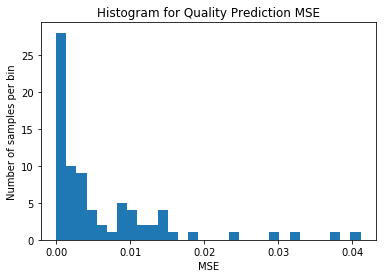

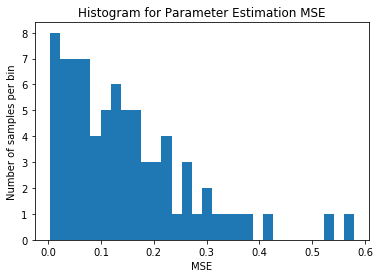

In [42]:
import statistics 

print("Quality Prediction Mean and STD, " , statistics.mean(all_results_opt), statistics.stdev(all_results_opt))
print("Parameter Estimation Mean and STD, " , statistics.mean(all_estimations_opt), statistics.stdev(all_estimations_opt))

plt.hist(all_results_opt, bins = 30)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE")
plt.show()

plt.hist(all_estimations_opt, bins = 30)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Parameter Estimation MSE")
plt.show()

